# PARAMETRIC VaR

In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

In [27]:
end_date = dt.datetime(2019,9,1)
strt_date = end_date - dt.timedelta(days=500)

In [28]:
Portfolio_Val = 1_000_000
stocks = [ "DLF.NS" , "NTPC.NS" , "HDFCBANK.NS" ] 

In [29]:
data = yf.download(stocks,
                   start=strt_date,
                   end=end_date)
data1= data.copy(deep=True)

[*********************100%%**********************]  3 of 3 completed


In [30]:
Adj_close = data1["Adj Close"]
print(Adj_close.head())
returns = np.log(Adj_close/Adj_close.shift(1)).dropna()

Ticker          DLF.NS  HDFCBANK.NS     NTPC.NS
Date                                           
2018-04-19  204.154343   917.039124  106.837708
2018-04-20  199.793488   925.031982  104.912163
2018-04-23  201.025879   915.502075  104.460854
2018-04-24  204.628342   915.147339  104.009560
2018-04-25  207.472366   908.407898  103.407829


In [31]:
w = [0.4 , 0.4 , 0.2 ]
portfolio_retrn = np.sum(w*returns,axis=1)

In [32]:
mean = portfolio_retrn.mean()
sd = portfolio_retrn.std()
print("Mean and Standard Deviation of the Portfolio are" , mean , "and" , sd , "respectively.")

Mean and Standard Deviation of the Portfolio are -0.00017421848829225845 and 0.014240925149758258 respectively.


In [33]:
ci = 0.99
z = stats.norm.ppf(1-ci,loc=0,scale=1)

In [34]:
Var = mean + z * sd
print("99% Parametric VaR for the Portfolio is INR", -Var*Portfolio_Val)

99% Parametric VaR for the Portfolio is INR 33303.56443480712


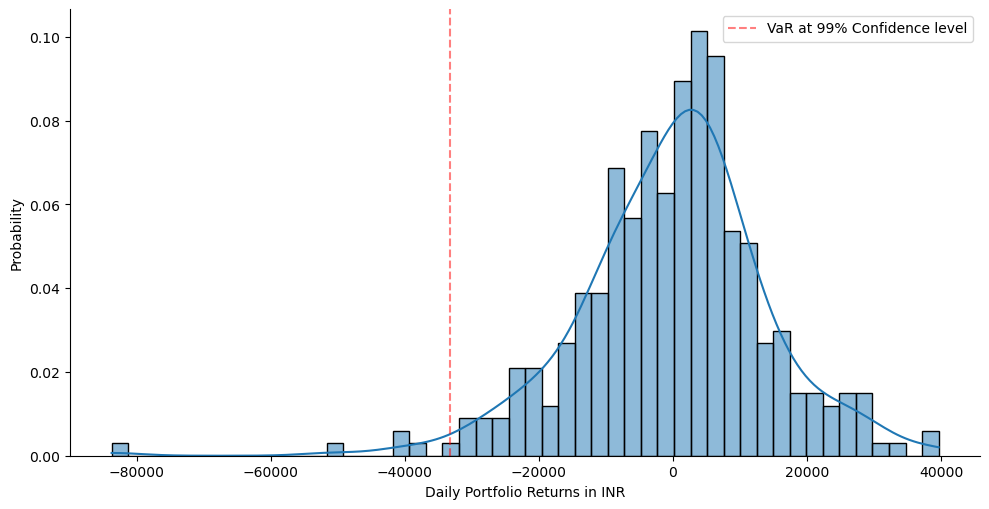

In [35]:
sns.displot(portfolio_retrn*Portfolio_Val,stat="probability",aspect=2,bins=50,kde=True)
plt.axvline(x=Var*Portfolio_Val,color='red',linestyle="--",label="VaR at 99% Confidence level",alpha=0.5)
plt.xlabel("Daily Portfolio Returns in INR")
plt.legend()

# VaR ESTIMATION USING HISTORICAL SIMULATION

In [37]:
Var_Hs = np.percentile(portfolio_retrn,100-ci*100)
Var_Hs = -Var_Hs*Portfolio_Val
print("VaR using Historical Simulation is INR", Var_Hs)

VaR using Historical Simulation is INR 38719.837933762836
